# aSPEM Experiment : analysis




In [1]:
!ls data/

lup_0_2017-05-24_160243.npy
lup_1_2017-05-24_160243.npy
psychophysique_chloe_2017-06-21_162644.pkl


In [2]:
%load_ext autoreload
%autoreload 2
from __future__ import division, print_function, absolute_import

%matplotlib inline
fig_width = 12

from aSPEM import aSPEM
timeStr = '2017-06-21_162644'
observer = 'chloe'
mode = 'psychophysique'
e = aSPEM(mode, observer, timeStr)

{'stim_tau': 0.35, 'screen_width_px': 1024, 'N_trials': 8, 'saccade_px': 237.312, 'N_frame_stim': 35, 'screen': 0, 'dot_size': 38.400000000000006, 'V_X': 289.10164519565433, 'results': array([[ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.]]), 'cachedir': 'data_cache', 'T': 0.35, 'N_blocks': 2, 'px_per_deg': 14.455082259782715, 'screen_height_px': 768, 'framerate': 100.0, 'p': array([[[ 1.        ,  0.95492037,  0.        ],
        [ 0.        ,  0.17017723,  0.        ]],

       [[ 1.        ,  0.95492037,  0.        ],
        [ 1.        ,  0.17017723,  0.        ]],

       [[ 1.        ,  0.57305837,  1.        ],
        [ 0.        ,  0.54761272,  1.        ]],

       [[ 1.        ,  0.8652157 ,  1.        ],
        [ 1.        ,  0.45926493,  1.        ]],

       [[ 1.        ,  0.8652157 ,  0.        ],
        [ 0.        ,  0.45926493,  0.        ]],

       [[ 1.        ,  0.

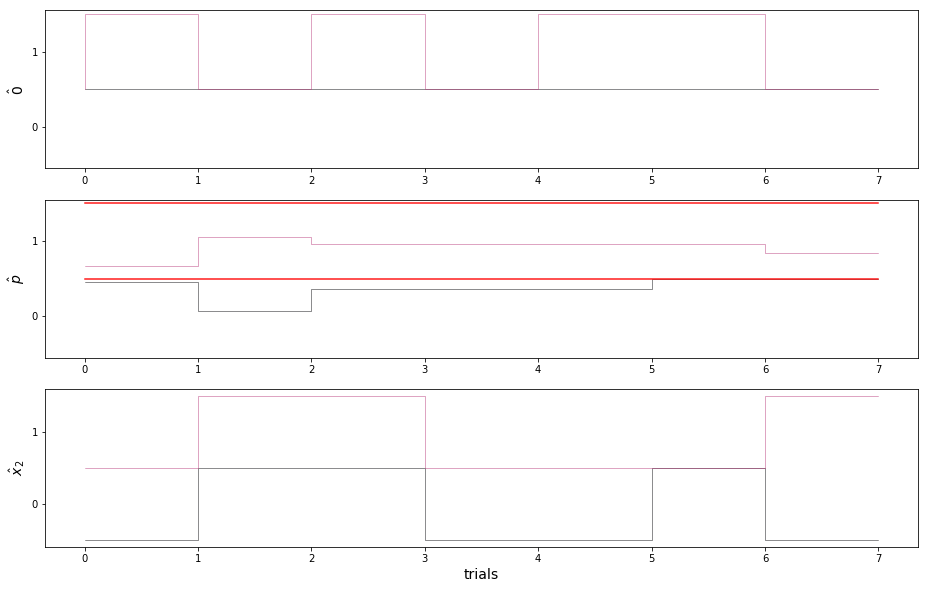

In [3]:
corrects = e.plot(mode=mode)